## Initial Code Setup

In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Load the CSV file into Pandas
df = pd.read_csv('data/housing_data_cleaned_transposed.csv', sep=',',skiprows=0, header=0)
df_e = pd.read_csv('data/economicData.csv', sep=',', skiprows=0, header=0)
df_physical = pd.read_csv('data/housing_size_data_cleaned.csv', sep=',', index_col=0, header=0)

df_pClean = pd.DataFrame()
df_pClean['Date'] = pd.to_datetime(df_physical['Date'], format='%Y-%m-%d')
df_pClean['Date'] = pd.to_numeric(df_pClean['Date'])
df_pClean['Prices'] = df_physical['SalePrice']
df_pClean['Quality'] = df_physical['Quality']
df_pClean['Area'] = df_physical['GrLivArea']
df_pClean['GarageCars'] = df_physical['GarageCars'] 

print(df_pClean)

                     Date  Prices  Quality  Area  GarageCars
Id                                                          
1     1496275200000000000  208500        7  1710           2
2     1496275200000000000  181500        6  1262           2
3     1496275200000000000  223500        7  1786           2
4     1496275200000000000  140000        7  1717           3
5     1496275200000000000  250000        8  2198           3
...                   ...     ...      ...   ...         ...
1456  1496275200000000000  175000        6  1647           2
1457  1496275200000000000  210000        6  2073           2
1458  1496275200000000000  266500        7  2340           1
1459  1496275200000000000  142125        5  1078           1
1460  1496275200000000000  147500        5  1256           1

[1460 rows x 5 columns]


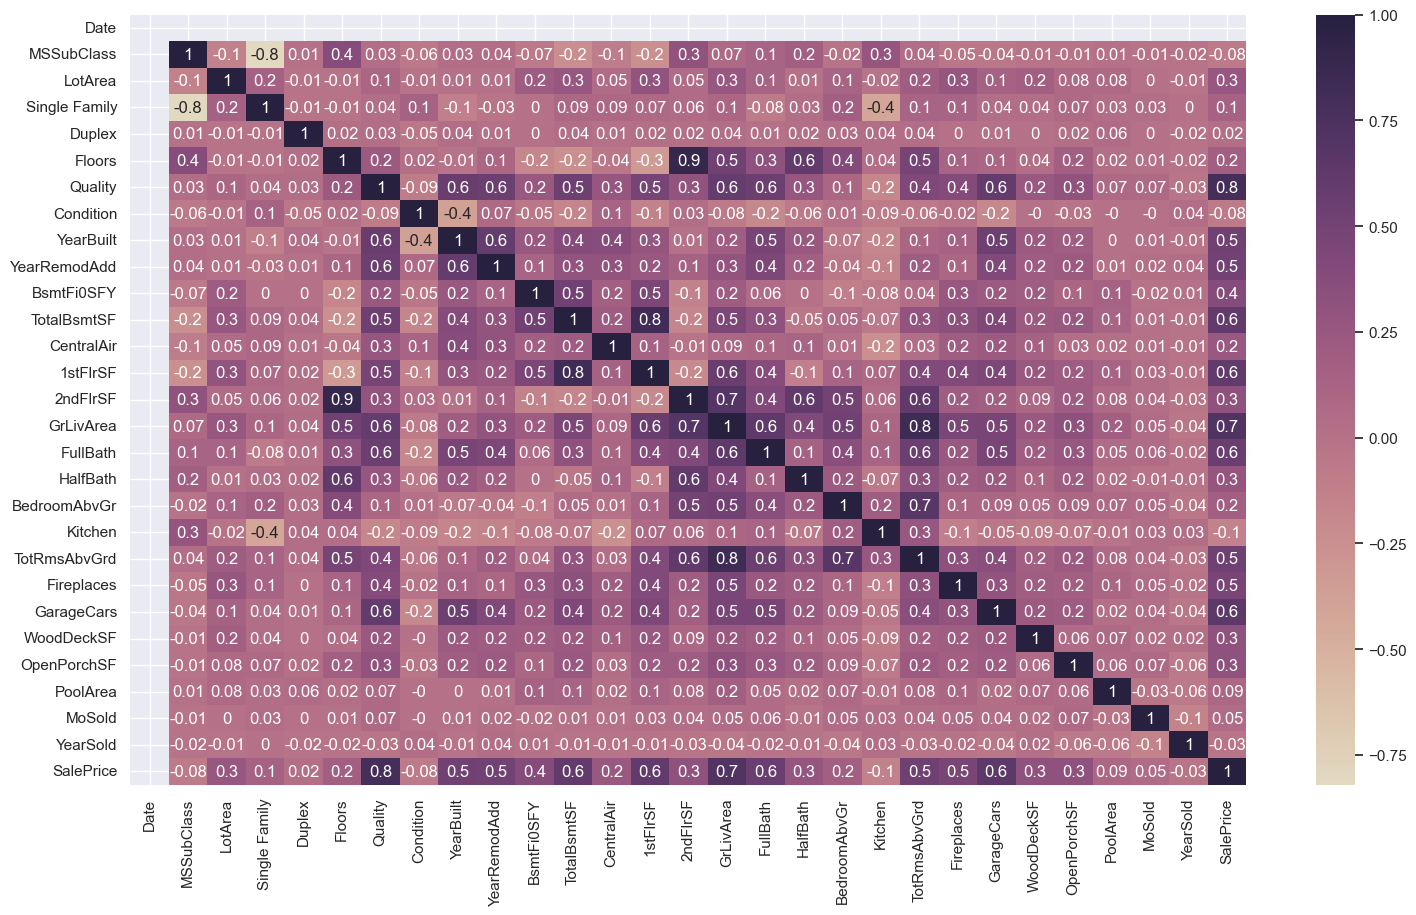

In [109]:
# Correlation Matrix for Physical Housing Data
df_physical['Date'] = pd.to_datetime(df_physical['Date'], format='%Y-%m-%d')
df_physical['Date'] = pd.to_numeric(df_physical['Date'])

sns.set(rc={'figure.figsize':(18,10)})
correlation_matrix = df_physical.corr().round(2)
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(data=correlation_matrix, annot=True, fmt='.1g', cmap=colormap)

plt.show()

In [110]:
# Join datasets to run correlation matrix
df_e = df_e.join(df['United States'])
df_e.rename(columns={'United States': 'Prices'}, inplace=True)

#df_e['Philadelphia'] = df['Philadelphia, PA']

# Convert date string to datetime format to use in correlation matrix
df_e['Date'] = pd.to_datetime(df_e['Date'], format='%Y-%m-%d')
df_e['Date'] = pd.to_numeric(df_e['Date'])

df_e.tail()

,Date,M2MS,FedFundsRate,CPI,Eggs,Lumber,Prices
149,1464739200000000000,12831.9,0.377667,2.568902,1.490667,196.533333,186600.0
150,1472688000000000000,13037.9,0.396333,2.632103,1.364667,189.100000,190300.0
151,1480550400000000000,13209.6,0.540000,2.594944,1.489000,193.633333,194200.0
152,1488326400000000000,13420.6,0.786129,2.453344,1.385000,201.466667,197200.0
153,1496275200000000000,13558.9,1.040000,2.138530,1.385000,202.300000,200400.0


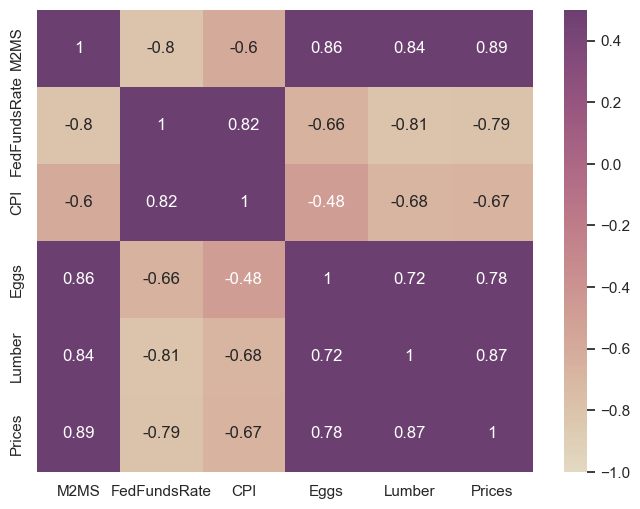

In [111]:
vars = ['M2MS', 'FedFundsRate', 'CPI', 'Eggs', 'Lumber', 'Prices']
corr = df_e.corr().round(2)        
sns.set(rc={'figure.figsize':(8,6)})
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(corr.loc[vars,vars], annot=True, cmap=colormap, vmax=.5, vmin=-1, center=0)
plt.show()

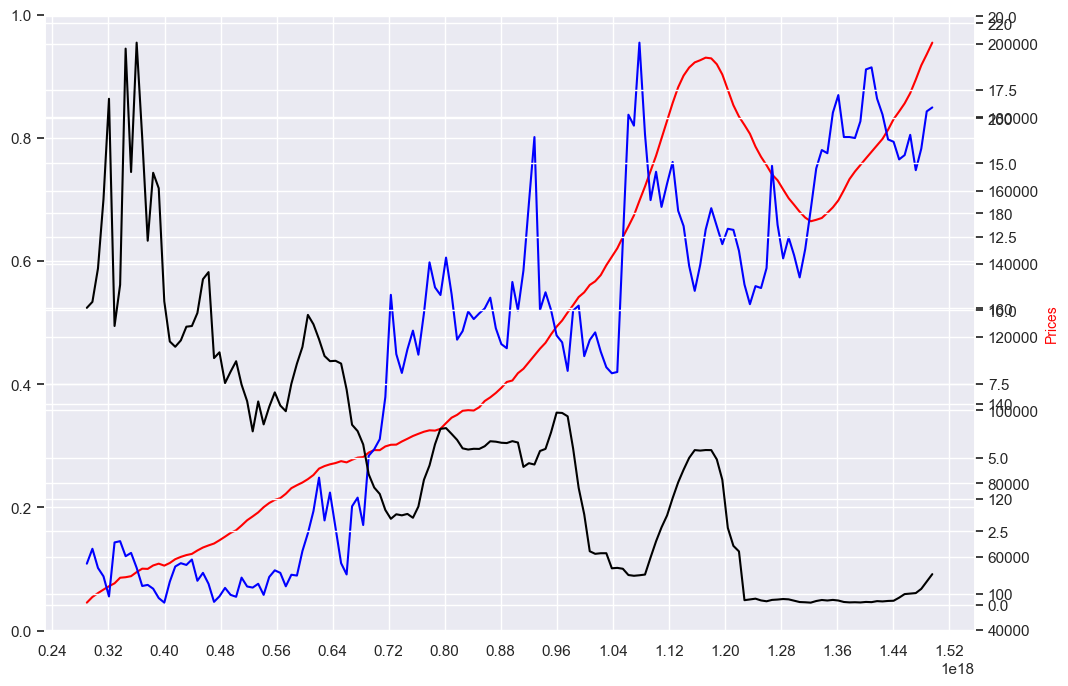

In [45]:
# Plot the rows of data as a separate line to previz to check for correlation

#define colors to use
col1 = 'green'
col2 = 'red'
col3 = 'blue'
col4 = 'black'

#define the subplots
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

fig,ax = plt.subplots(figsize=(12, 8))
ax.xaxis.set_major_locator(plt.MaxNLocator(22))


# add first dataset to plot
#ax.plot(df_e.Date, df_e.CPI, color=col1)
#ax.set_xlabel('Date', fontsize=14)
#ax.set_ylabel('CPI', color=col1, fontsize=16)

# add second dataset to plot, along secondary y-axis
ax2 = ax.twinx()
ax2.plot(df_e.Date, df_e.Prices, color=col2)
ax2.set_ylabel('Prices', color=col2, fontsize=10)

# add third dataset (to secondary y-axis)
ax3 = ax.twinx()
ax3.plot(df_e.Date, df_e.Lumber, color=col3)
# ax3.set_ylabel('M2', color=col3, fontsize=10)

# add fourth dataset (to secondary y-axis)
ax4 = ax.twinx()
ax4.plot(df_e.Date, df_e.FedFundsRate, color=col4)
#ax4.set_ylabel('FedRate', color=col4, fontsize=10)


In [37]:
from IPython.display import display
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

Mean Absolute Error: $ 14,384


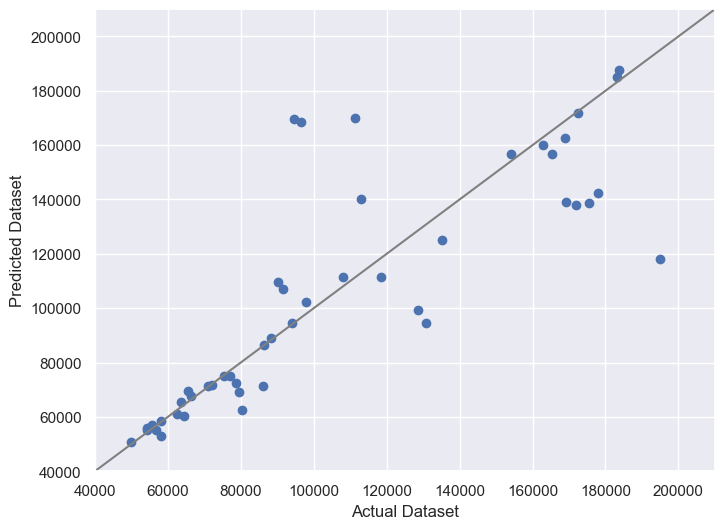

In [112]:
#Train first dataframe (based on macroeconomic data)

X = df_e[['Eggs', 'FedFundsRate', 'CPI', 'Lumber']]
y = df_e['Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

metrics.mean_absolute_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error: $ {:,}'.format(int(mae)))
plt.scatter(y_test, y_pred)
plt.xlim(40000,210000)
plt.ylim(40000,210000)
plt.ylabel('Predicted Dataset')
plt.xlabel('Actual Dataset')
plt.plot([40000,210000], [40000,210000], 'grey') #1 to 1 line

Mean Absolute Error: $ 25,238


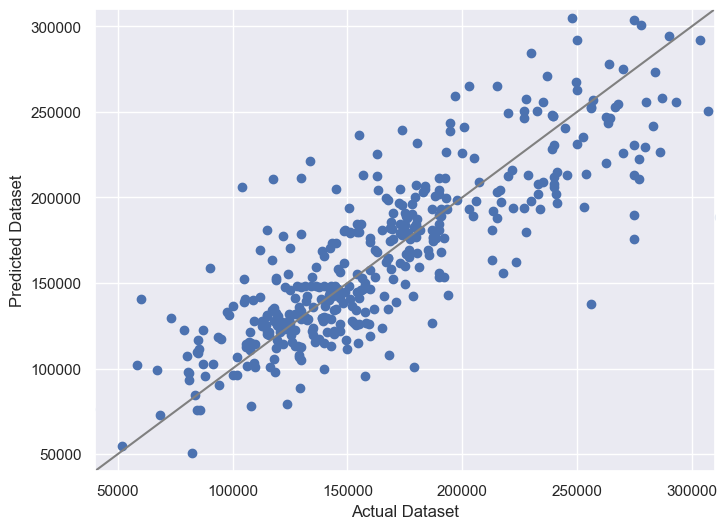

In [113]:
#train second dataframe (based on physical attributes)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X2 = df_pClean[['Date', 'Quality', 'Area', 'GarageCars']]
y2 = df_pClean['Prices']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

regr2 = RandomForestRegressor()
regr2.fit(X_train2, y_train2)

y_pred2 = regr2.predict(X_test2)

metrics.mean_absolute_error(y_test2, y_pred2)
mae2 = metrics.mean_absolute_error(y_test2, y_pred2)

print('Mean Absolute Error: $ {:,}'.format(int(mae2)))

plt.scatter(y_test2, y_pred2)
plt.xlim(40000,310000)
plt.ylim(40000,310000)
plt.ylabel('Predicted Dataset')
plt.xlabel('Actual Dataset')
plt.plot([40000,310000], [40000,310000], 'grey') #1 to 1 line

In [123]:
import numpy as np
#from sklearn.linear_model import LinearRegression

# Load the two datasets
#house_data = df_pClean
#historical_prices = df_e

# Merge the two datasets based on the year
data = pd.merge(df_pClean, df_e, on='Date')
data = pd.concat([df_pClean, df_e], ignore_index=True, sort=False)
print(data)


                     Date    Prices  Quality    Area  GarageCars     M2MS  \
0     1496275200000000000  208500.0      7.0  1710.0         2.0      NaN   
1     1496275200000000000  181500.0      6.0  1262.0         2.0      NaN   
2     1496275200000000000  223500.0      7.0  1786.0         2.0      NaN   
3     1496275200000000000  140000.0      7.0  1717.0         3.0      NaN   
4     1496275200000000000  250000.0      8.0  2198.0         3.0      NaN   
...                   ...       ...      ...     ...         ...      ...   
1609  1464739200000000000  186600.0      NaN     NaN         NaN  12831.9   
1610  1472688000000000000  190300.0      NaN     NaN         NaN  13037.9   
1611  1480550400000000000  194200.0      NaN     NaN         NaN  13209.6   
1612  1488326400000000000  197200.0      NaN     NaN         NaN  13420.6   
1613  1496275200000000000  200400.0      NaN     NaN         NaN  13558.9   

      FedFundsRate       CPI      Eggs      Lumber  
0              NaN    

In [160]:
from sklearn.impute import SimpleImputer

# Split the merged dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data[['Date', 'Quality', 'Area', 'Lumber']], data['Prices'], test_size=0.2, random_state=42)

# Train a linear regression model on the training set
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)

# Impute the missing values using the mean value of each feature
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train a random forest regressor on the imputed data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
score = model.score(X_test, y_test)
print('R^2 score:', score)

#y_pred = regr.predict(X_test)

#metrics.mean_absolute_error(y_test, y_pred)
#mae2 = metrics.mean_absolute_error(y_test, y_pred)

#print('Mean Absolute Error: $ {:,}'.format(int(mae2)))

new_data = pd.DataFrame({'Date': [1496275200000000000], 'Quality': [6], 'Area': [1700], 'Lumber': [50]})
prediction = model.predict(new_data)

print('Quality: 6 Area: 1700  Prediction: $ {:,}'.format(int(prediction)))



/Users/scottsullivan/.local/share/virtualenvs/Capstone-pM5Gt1Fd-python/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


R^2 score: 0.7238262909141109
Quality: 6 Area: 1700  Prediction: $ 181,100


/Users/scottsullivan/.local/share/virtualenvs/Capstone-pM5Gt1Fd-python/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
